In [21]:
from collections import Counter
import matplotlib.pyplot as plt

In [10]:
def text_to_shifts(key, alphabet):
    return [alphabet.index(char) for char in key if char in alphabet]

def vigenere_encrypt(text, key_shifts, alphabet):
    encrypted_text = []
    key_length = len(key_shifts)

    for i, char in enumerate(text):
        if char in alphabet:
            shift = key_shifts[i % key_length]
            char_index = alphabet.index(char)
            new_index = (char_index + shift) % len(alphabet)
            encrypted_text.append(alphabet[new_index])
        else:
            encrypted_text.append(char)

    return ''.join(encrypted_text)

def encrypt_text_with_keys(input_file, keys, alphabet):

    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read().strip()

    for key in keys:
        key_shifts = text_to_shifts(key, alphabet)
        encrypted_text = vigenere_encrypt(text, key_shifts, alphabet)

        output_filename = f'encrypted{len(key)}.txt'
        with open(output_filename, 'w', encoding='utf-8') as output_file:
            output_file.write(encrypted_text)

alphabet = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
keys = ["ад", "рай", "вера", "иисус", "судныйдень", "триединство", "апостолиоанн", "игорьандрущак", "архангелмихаил"]
input_file = 'cleaned_bible_no_spaces.txt'

encrypt_text_with_keys(input_file, keys, alphabet)


In [11]:
def calculate_ic_from_text(input_file):
    with open(input_file, 'r', encoding='utf-8') as file:
        text = file.read()

    symbol_counts = Counter(text)

    n = len(text)

    numerator = sum(count * (count - 1) for count in symbol_counts.values())
    denominator = n * (n - 1)
    IC = numerator / denominator if denominator != 0 else 0

    return IC

IC = calculate_ic_from_text(input_file)
print(f"IC: {IC}")

IC: 0.060727478203206356


In [12]:
IC2 = calculate_ic_from_text("encrypted2.txt")
IC3 = calculate_ic_from_text("encrypted3.txt")
IC4 = calculate_ic_from_text("encrypted4.txt")
IC5 = calculate_ic_from_text("encrypted5.txt")
IC10 = calculate_ic_from_text("encrypted10.txt")
IC11 = calculate_ic_from_text("encrypted11.txt")
IC12 = calculate_ic_from_text("encrypted12.txt")
IC13 = calculate_ic_from_text("encrypted13.txt")
IC14 = calculate_ic_from_text("encrypted14.txt")

print(f"IC2: {IC2}")
print(f"IC3: {IC3}")
print(f"IC4: {IC4}")
print(f"IC5: {IC5}")
print(f"IC10: {IC10}")
print(f"IC11: {IC11}")
print(f"IC12: {IC12}")
print(f"IC13: {IC13}")
print(f"IC14: {IC14}")

IC2: 0.04927063826740202
IC3: 0.03942180317584848
IC4: 0.03864504188128784
IC5: 0.04024370691037358
IC10: 0.03387550960366494
IC11: 0.03604079008609753
IC12: 0.03677707884827626
IC13: 0.03350970017636684
IC14: 0.034123014705538975


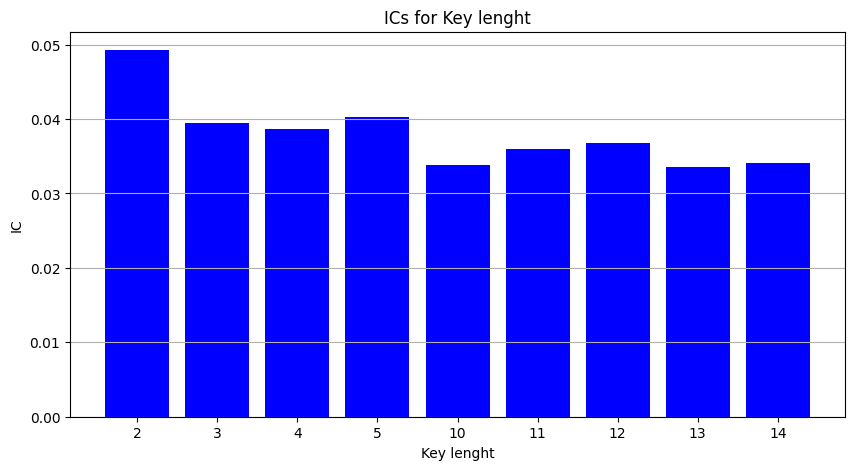

In [28]:
IC_values = [
    calculate_ic_from_text("encrypted2.txt"),
    calculate_ic_from_text("encrypted3.txt"),
    calculate_ic_from_text("encrypted4.txt"),
    calculate_ic_from_text("encrypted5.txt"),
    calculate_ic_from_text("encrypted10.txt"),
    calculate_ic_from_text("encrypted11.txt"),
    calculate_ic_from_text("encrypted12.txt"),
    calculate_ic_from_text("encrypted13.txt"),
    calculate_ic_from_text("encrypted14.txt")
]

keys_numbers = ['2', '3', '4', '5', '10', '11', '12', '13', '14']

plt.figure(figsize=(10, 5))
plt.bar(keys_numbers, IC_values, color='b')
plt.title('ICs for Key lenght')
plt.xlabel('Key lenght')
plt.ylabel('IC')
plt.xticks(keys_numbers)
plt.grid(axis='y')
plt.show()

Key length: 2, IC: 0.0339
Key length: 3, IC: 0.0362
Key length: 4, IC: 0.0337
Key length: 5, IC: 0.0395
Key length: 6, IC: 0.0361
Key length: 7, IC: 0.0338
Key length: 8, IC: 0.0337
Key length: 9, IC: 0.0361
Key length: 10, IC: 0.0395
Key length: 11, IC: 0.0337
Key length: 12, IC: 0.0360
Key length: 13, IC: 0.0336
Key length: 14, IC: 0.0339
Key length: 15, IC: 0.0561
Key length: 16, IC: 0.0337
Key length: 17, IC: 0.0337
Key length: 18, IC: 0.0361
Key length: 19, IC: 0.0335
Key length: 20, IC: 0.0394
Key length: 21, IC: 0.0362
Key length: 22, IC: 0.0336
Key length: 23, IC: 0.0341
Key length: 24, IC: 0.0361
Key length: 25, IC: 0.0390
Key length: 26, IC: 0.0335
Key length: 27, IC: 0.0356
Key length: 28, IC: 0.0337
Key length: 29, IC: 0.0340
Key length: 30, IC: 0.0560


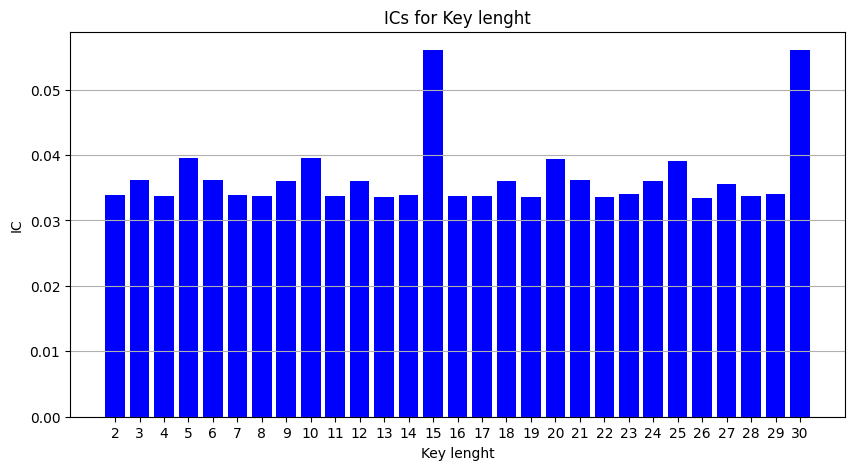

In [31]:
import matplotlib.pyplot as plt
from collections import Counter

def calculate_single_IC(text_block):
    freaks = Counter(text_block)
    n = len(text_block)

    if n == 0:
        return 0

    index = sum(f * (f - 1) for f in freaks.values()) / (n * (n - 1))
    return index

def splitting_func(text, key_length):
    blocks = ['' for _ in range(key_length)]
    for i, char in enumerate(text):
        blocks[i % key_length] += char
    return blocks

def calculate_ICs(file_path, min_key_length=2, max_key_length=30):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().replace('\n', '').replace(' ', '')

    key_lengths = []
    average_ICs = []

    for key_length in range(min_key_length, max_key_length + 1):
        blocks = splitting_func(text, key_length)
        indices = [calculate_single_IC(block) for block in blocks]

        average_index = sum(indices) / len(indices) if indices else 0
        key_lengths.append(key_length)
        average_ICs.append(average_index)
        print(f"Key length: {key_length}, IC: {average_index:.4f}")

    return key_lengths, average_ICs


key_lengths, average_ICs = calculate_ICs('var_text.txt')


plt.figure(figsize=(10, 5))
plt.bar(key_lengths, average_ICs, width=0.8, color='b')
plt.title('ICs for Key lenght')
plt.xlabel('Key lenght')
plt.ylabel('IC')
plt.xticks(key_lengths)
plt.grid(axis='y')
plt.show()



In [18]:
def key_finder(file_path, key_length):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().replace('\n', '').replace(' ', '')
    blocks = splitting_func(text, key_length)
    key = [
        chr((ord(Counter(block).most_common(1)[0][0]) - ord('е')) % 32 + ord('а'))
        for block in blocks
    ]
    return ''.join(key)

key = key_finder('var_text.txt', 15)
print(key)

йщьнйролйщюсхйм


In [19]:
def vigenere_decrypt(ciphertext, key):
    alphabet = 'абвгдежзийклмнопрстуфхцчшщъыьэюя'
    decrypted_text = []
    key = key.lower()
    key_length = len(key)

    ciphertext = ''.join([c for c in ciphertext.lower() if c in alphabet])


    for i, char in enumerate(ciphertext):
        if char in alphabet:
            text_index = alphabet.index(char)
            key_index = alphabet.index(key[i % key_length])
            decrypted_index = (text_index - key_index) % len(alphabet)
            decrypted_text.append(alphabet[decrypted_index])
        else:
            decrypted_text.append(char)

    return ''.join(decrypted_text)

with open('var_text.txt', 'r', encoding='utf-8') as file:
    ciphertext = file.read().replace('\n', '').replace(' ', '')
key = "арудазевархимаг"


decrypted_message = vigenere_decrypt(ciphertext, key)
print("Decrypted text:", decrypted_message)

Decrypted text: прошлошятнадцатьднейиътарыйдомпостепонноначаложиватесороклетвнемниутонежилпонастоищемузаэтовремячнсменилодиннадяатьхозяевноникыоизнихневыдержсвалвподобноммеътебольшетрехмеъяцевкреоливанеъсасталидвенадцйтымимагполностеюпогрузилсявракотуонотрывалсяыолькозатемчтобдпоестьаотснаизкавлялсязаклятиомбессонницынодфякреолаэтоявноцепроходилобезнйказанноглазауногопокраснелиавокинабряклииотвссливанессавсячоскистараласьубодитьеговтомчтоомуследуетпрекрйтитьиздевательътванадорганизмчмихотьразоквысшатьсяпонастоящомуномагтолькоомрызалсязанималъяондвумяделамицеутомимописалмйгическуюкнигуичкутывалособнякхагическойзащитчйитоидругоетрековалоуймывремециакреолникакнехогрешитьчтодляцегоболеесрочношоэтомузанималсиобоимиделамипошеременносначалйонвсерьезбеспоуоилсяотомчтозаогодушойвотвотялитсяужасныйтротнопотомутихомищилсярешивчтотоыскореевсегодажонезнаетовоскребениистаринноголрагапокрайнеймореванессаизбавсласьотдомашнихюлопотбраунихубортнеизменносохщаняяпостноевырйжениелицаубирафсяготовилиобстсры